<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
data = yf.download('GBPUSD=X',interval='1mo')

[*********************100%***********************]  1 of 1 completed


In [40]:
data = data['2004':'2022-12']
data = data[['Adj Close']]

In [41]:
data.columns = ['price_gbp']
data['ret_gbp'] = np.log(data.price_gbp).diff()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 228 entries, 2004-01-01 to 2022-12-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_gbp  228 non-null    float64
 1   ret_gbp    227 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


<Axes: xlabel='Date'>

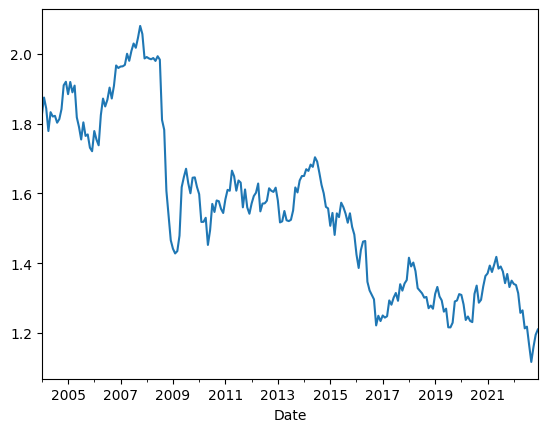

In [42]:
data.price_gbp.plot()

<Axes: xlabel='Date'>

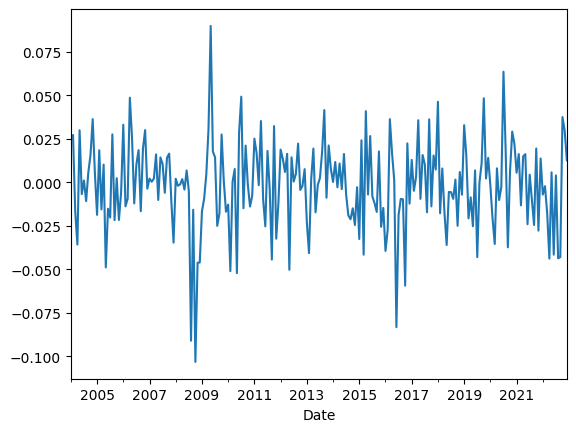

In [43]:
data.ret_gbp.plot()

In [47]:
data['const'] = 1
y = data.ret_gbp
x = data.const
res_rw = sm.OLS(y,x,missing='drop').fit()
print(res_rw.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Apr 2023   Prob (F-statistic):                nan
Time:                        01:49:47   Log-Likelihood:                 512.37
No. Observations:                 227   AIC:                            -1023.
Df Residuals:                     226   BIC:                            -1019.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.002     -1.074      0.2

In [45]:
data['ret_gbp_1'] = data.ret_gbp.shift()
data['ret_gbp_2'] = data.ret_gbp.shift(2)
y = data.ret_gbp
x = sm.add_constant(data['ret_gbp_1'])
res_ar1 = sm.OLS(y,x,missing='drop').fit()
print(res_ar1.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7061
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.402
Time:                        01:48:56   Log-Likelihood:                 510.62
No. Observations:                 226   AIC:                            -1017.
Df Residuals:                     224   BIC:                            -1010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0018      0.002     -1.082      0.2

In [46]:
y = data.ret_gbp
x = sm.add_constant(data[['ret_gbp_1','ret_gbp_2']])
res_ar2 = sm.OLS(y,x,missing='drop').fit()
print(res_ar2.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.968
Date:                Thu, 27 Apr 2023   Prob (F-statistic):              0.142
Time:                        01:48:57   Log-Likelihood:                 509.66
No. Observations:                 225   AIC:                            -1013.
Df Residuals:                     222   BIC:                            -1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.002     -0.901      0.3

In [71]:
# 估計結果各項物件 
# random walk model (benchmark)
res_rw.resid # 誤差
res_rw.params # 估計參數數值
res_rw.pvalues # p-values
res_rw.fittedvalues # fitted value of y
res_rw.tvalues # t-value

0.8403059737034195

In [ ]:
# newey-west standard error
sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':1})